**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved

In [13]:
#PCA from Numpy functions - Assignment 1

#Import numpy, matplotlib, seaborn lib functions
import numpy as np
from numpy import array
from numpy import mean
from numpy import cov
from numpy import sum
from numpy import var
from numpy import matmul
from numpy import arange
from numpy import round
from numpy.linalg import eig
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the mean of each column
#def data_mean(data_in):
#YOUR CODE HERE
def data_mean(data):
    return np.mean(data, axis=1)


# Shift data to origin subtracting column means from columns
#def data_center(data_in, data_mean):
#YOUR CODE HERE
def data_center(data, mean):
    return (data - mean[:, None])


# Calculate covariance matrix of the shifted matrix
#def data_cov(data_in):
#YOUR CODE HERE

def data_cov(data):
    return np.cov(data)


# Perform Eigen decomposition of covariance matrix
#def data_eig(data_in):
#YOUR CODE HERE

def data_eig(cov_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort eigenvectors based on the eigenvalues (from highest to lowest)

    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]

    return eigenvalues, eigenvectors



# Project data onto new axis
#def data_proj(data_in, eigenvectors):
#YOUR CODE HERE

def data_proj(data, eigenvectors):
    return np.dot(eigenvectors.T, data)

#Calculate variance ratios
#def variance_ratio(eigenvalues):
#YOUR CODE HERE

def variance_ratio(eigenvalues):
    return eigenvalues / np.sum(eigenvalues)


#Run the doctest module.  DO NOT modify any code below this line!
import doctest

data_a = array([[43, 26, 28, 29, 42, 39],
              [8.5, 5.0, 6.1, 4.6, 7.2, 7.4]])
mean_a = data_mean(data_a)
center_a = data_center(data_a, mean_a)
covariance_a = data_cov(center_a)
eigenvalues_a, eigenvectors_a = data_eig(covariance_a)
projection_a = data_proj(center_a, eigenvectors_a)
var_ratio_a = variance_ratio(eigenvalues_a)

data_b = array([[43, 26, 28, 29, 42, 39],
                [8.5, 5.0, 6.1, 4.6, 7.2, 7.4],
                [170, 104, 121, 130, 159, 132],
                [5.0, 5.9, 5.5, 5.8, 4.7, 5.7]])
mean_b = data_mean(data_b)
center_b = data_center(data_b, mean_b)
covariance_b = data_cov(center_b)
eigenvalues_b, eigenvectors_b = data_eig(covariance_b)
projection_b = data_proj(center_b, eigenvectors_b)
var_ratio_b = variance_ratio(eigenvalues_b)

"""
  >>> print(round(mean_a, 4))
  [34.5     6.4667]
  >>> print(round(center_a, 4))
  [[ 8.5    -8.5    -6.5    -5.5     7.5     4.5   ]
   [ 2.0333 -1.4667 -0.3667 -1.8667  0.7333  0.9333]]
  >>> print(round(covariance_a, 4))
  [[58.7    10.42  ]
   [10.42    2.2627]]
  >>> print(round(eigenvalues_a, 4))
  [60.5624  0.4003]
  >>> print(round(eigenvectors_a, 4))
  [[ 0.9844 -0.1759]
   [ 0.1759  0.9844]]
  >>> print(round(projection_a, 4))
  [[ 8.7252 -8.6255 -6.4631 -5.7426  7.512   4.594 ]
   [ 0.5061  0.0517  0.7827 -0.8699 -0.5977  0.127 ]]
  >>> print(round(var_ratio_a, 4))
  [0.9934 0.0066]

  >>> print(round(mean_b, 4))
  [ 34.5      6.4667 136.       5.4333]
  >>> print(round(center_b, 4))
  [[  8.5     -8.5     -6.5     -5.5      7.5      4.5   ]
   [  2.0333  -1.4667  -0.3667  -1.8667   0.7333   0.9333]
   [ 34.     -32.     -15.      -6.      23.      -4.    ]
   [ -0.4333   0.4667   0.0667   0.3667  -0.7333   0.2667]]
  >>> print(round(covariance_b, 4))
  [[ 5.8700e+01  1.0420e+01  1.6920e+02 -2.8800e+00]
   [ 1.0420e+01  2.2627e+00  2.9180e+01 -5.1270e-01]
   [ 1.6920e+02  2.9180e+01  5.9720e+02 -1.0160e+01]
   [-2.8800e+00 -5.1270e-01 -1.0160e+01  2.3070e-01]]
  >>> print(round(eigenvalues_b, 4))
  [6.476053e+02 1.034020e+01 3.908000e-01 5.710000e-02]
  >>> print(round(eigenvectors_b, 4))
  [[-0.2766 -0.9392 -0.2031 -0.0091]
   [-0.0479 -0.1978  0.978   0.0459]
   [-0.9596  0.2806  0.009   0.0173]
   [ 0.0163 -0.0044 -0.047   0.9988]]
  >>> print(round(projection_b, 4))
  [[-3.50837e+01  3.31378e+01  1.62114e+01  7.37470e+00 -2.41936e+01
     2.55330e+00]
   [ 1.15500e+00 -7.06200e-01  1.96890e+00  3.85010e+00 -7.33300e-01
    -5.53450e+00]
   [ 5.87300e-01 -1.68000e-02  8.24000e-01 -7.79500e-01 -5.65400e-01
    -4.95000e-02]
   [ 1.72400e-01 -7.84000e-02 -1.51000e-01  2.26700e-01 -3.68500e-01
     1.98800e-01]]
  >>> print(round(var_ratio_b, 4))
  [9.836e-01 1.570e-02 6.000e-04 1.000e-04]

"""

doctest.testmod(verbose=True)

Trying:
    print(round(mean_a, 4))
Expecting:
    [34.5     6.4667]
ok
Trying:
    print(round(center_a, 4))
Expecting:
    [[ 8.5    -8.5    -6.5    -5.5     7.5     4.5   ]
     [ 2.0333 -1.4667 -0.3667 -1.8667  0.7333  0.9333]]
ok
Trying:
    print(round(covariance_a, 4))
Expecting:
    [[58.7    10.42  ]
     [10.42    2.2627]]
ok
Trying:
    print(round(eigenvalues_a, 4))
Expecting:
    [60.5624  0.4003]
ok
Trying:
    print(round(eigenvectors_a, 4))
Expecting:
    [[ 0.9844 -0.1759]
     [ 0.1759  0.9844]]
ok
Trying:
    print(round(projection_a, 4))
Expecting:
    [[ 8.7252 -8.6255 -6.4631 -5.7426  7.512   4.594 ]
     [ 0.5061  0.0517  0.7827 -0.8699 -0.5977  0.127 ]]
ok
Trying:
    print(round(var_ratio_a, 4))
Expecting:
    [0.9934 0.0066]
ok
Trying:
    print(round(mean_b, 4))
Expecting:
    [ 34.5      6.4667 136.       5.4333]
ok
Trying:
    print(round(center_b, 4))
Expecting:
    [[  8.5     -8.5     -6.5     -5.5      7.5      4.5   ]
     [  2.0333  -1.4667  -0.3667  

TestResults(failed=0, attempted=14)

In [14]:
#PCA and classification - Assignment 2


#1.  import libs and dataset
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

breast_cancer = load_breast_cancer()

In [15]:
#Examine the dataset

print(breast_cancer.feature_names)
print(len(breast_cancer.feature_names))
print(breast_cancer.target)
print(breast_cancer.target_names)
print(np.array(np.unique(breast_cancer.target, return_counts=True)))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 

In [16]:
#2.  Load data into dataframe
#    https://pandas.pydata.org/docs/reference/frame.html
#YOUR CODE HERE

data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
target = pd.Series(breast_cancer.target)

In [17]:
#3.  Train and test a model using all the features with Logistic regression
#    Use the unscaled (raw) dataset - we will scale and rerun in the next step.
#    Use a train/test split of 70/30 (30% test)
#    https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection
#    https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
#    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit
#    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score

#YOUR CODE HERE
#Assign indep and dep vars (X, y) from your dataframe
#Generate training split (X_train, X_test, y_train, y_test)
#Perform Logistic Regresssion on your training data
#Generate the score of your model (e.g. _.score(X_test, y_test))
#print('Logistic regression model score on original UNSCALED dataset (all features):', _.score(X_test,y_test))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
print('Logistic regression model score on original UNSCALED dataset (all features):', model.score(X_test,y_test))


Logistic regression model score on original UNSCALED dataset (all features): 0.9766081871345029


In [18]:
#4.  Scale data using Standard Scaling - this will be for PCA processing
#    Rerun logistic regression model on the scaled data to have apples to apples comparison on score after PCA.
#    https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
#    https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform
#
#YOUR CODE HERE
#Scale data with standard scaler
#Generate training split (X_train_scaled, X_test_scaled, y_train, y_test)
#Perform Logistic Regresssion on your training data (X_train_scaled, y_train)
#Generate the score of your model (e.g. _scaled.score(X_test_scaled, y_test))
#print('Logistic regression model score on original SCALED dataset (all features):', _scaled.score(X_test_scaled,y_test))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_scaled = LogisticRegression(max_iter=10000)
model_scaled.fit(X_train_scaled, y_train)
print('Logistic regression model score on original SCALED dataset (all features):', model_scaled.score(X_test_scaled,y_test))



Logistic regression model score on original SCALED dataset (all features): 0.9824561403508771


In [19]:
#5. Perform PCA keeping all components (e.g. components=None)
#   Make sure to perform PCA using the scaled data
#   https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA
#   https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit
#YOUR CODE HERE
#use None to keep all components

pca = PCA()
pca.fit(X_train_scaled)


PCA()

In [20]:
#6. Generate the explained variances
#   Interpret the results
#   How much data variability does the 1st PC capture?
#   How much data variability does the 1st + 2nd PCs capture?
#
#YOUR CODE HERE
#Generate explained variance ratio
#Generate cumulative variance ratios (_.cumsum())
#print("Variances (Percentage):")
#print(pca.explained_variance_ratio_ * 100)
#print("Cumulative Variances (Percentage):")
#print(pca.explained_variance_ratio_.cumsum() * 100)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Variances (Percentage):", explained_variance * 100)
print("Cumulative Variances (Percentage):", cumulative_variance * 100)


Variances (Percentage): [4.31674797e+01 1.98456518e+01 9.73315919e+00 6.53157416e+00
 5.21215121e+00 4.19895964e+00 2.26346091e+00 1.68266865e+00
 1.29469004e+00 1.20940991e+00 1.05718541e+00 8.99278095e-01
 8.09411361e-01 5.10761728e-01 2.82723938e-01 2.29310126e-01
 1.98205581e-01 1.79731659e-01 1.66263238e-01 1.05609966e-01
 9.18143445e-02 9.03926694e-02 7.82753227e-02 5.68800600e-02
 5.03380563e-02 2.44129784e-02 2.23185341e-02 4.96327267e-03
 2.53024192e-03 3.88199283e-04]
Cumulative Variances (Percentage): [ 43.16747974  63.01313149  72.74629069  79.27786484  84.49001605
  88.6889757   90.95243661  92.63510526  93.9297953   95.13920522
  96.19639063  97.09566872  97.90508008  98.41584181  98.69856575
  98.92787588  99.12608146  99.30581312  99.47207635  99.57768632
  99.66950067  99.75989333  99.83816866  99.89504872  99.94538677
  99.96979975  99.99211829  99.99708156  99.9996118  100.        ]


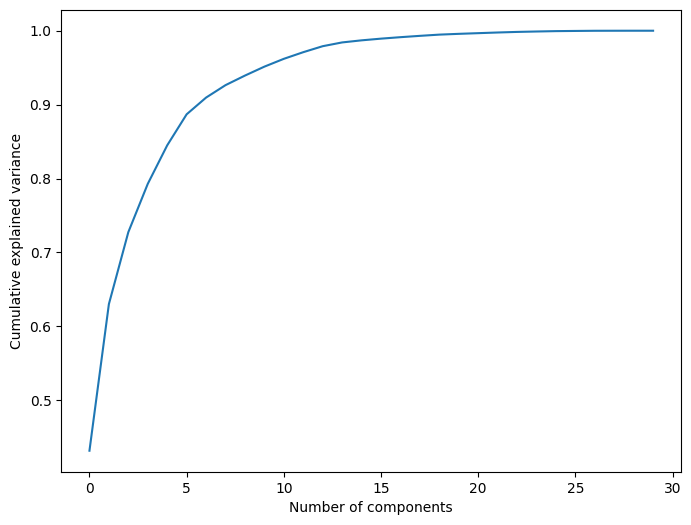

In [21]:
#7.  Generate Scree plot to view cumulative variances
#    https://seaborn.pydata.org/generated/seaborn.barplot.html
#    https://seaborn.pydata.org/generated/seaborn.lineplot.html
#YOUR CODE HERE


plt.figure(figsize=(8,6))
sns.lineplot(data=cumulative_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [22]:
#8.  Apply PCA with explained variance percentage (70%, 80%, 90%)
#    or use retained number of components corresponding to these %s
#    (use None to keep all components)
#    You will need to rerun PCA with the n_components parameter set.
#    Print the pca components_ to observe the importance each feature contributes
#    to each of the principal components.
#    Identify the top 3 most important features in each component.
#YOUR CODE HERE
#pca = PCA(n_components = 0.70)
#pca = PCA(n_components = 0.80)
#pca = PCA(n_components = 0.90)

for explained_variance_pct in [0.7, 0.8, 0.9]:
    pca = PCA(n_components=explained_variance_pct)
    pca.fit(X_train_scaled)

    # The following code section for most important features, by importance was taken from a response in stackoverflow.
    #Reference URL: https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis

    # number of components
    n_pcs= pca.components_.shape[0]

    # get the index of the most important feature on EACH component
    # LIST COMPREHENSION HERE
    most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

    initial_feature_names = initial_feature_names = ['mean radius','mean texture','mean perimeter','mean area','mean smoothness', 'mean compactness','mean concavity',  'mean concave points','mean symmetry', 'mean fractal dimension','radius error','texture error','perimeter error','area error','smoothness error','compactness error','concavity error','concave points error' 'symmetry error' 'fractal dimension error','worst radius','worst texture','worst perimeter','worst area','worst smoothness','worst compactness','worst concavity','worst concave points','worst symmetry','worst fractal dimension']
# get the names
    most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
    dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# Build a dataframe showing important features
    df = pd.DataFrame(dic.items())
    print("Dataframe showing most important features:")
    print(df)
    print("For explained variance of ", explained_variance_pct)
    print("Number of components = ", pca.n_components_)
    print("PCA components = ", pca.components_)


Dataframe showing most important features:
     0                       1
0  PC0     mean concave points
1  PC1  mean fractal dimension
2  PC2           texture error
For explained variance of  0.7
Number of components =  3
PCA components =  [[ 0.21692715  0.10684106  0.22602609  0.21959403  0.14197381  0.23873081
   0.26035725  0.26364811  0.14806538  0.05869441  0.20515344  0.03646993
   0.20945384  0.19927449  0.02593568  0.16598312  0.15601627  0.18301435
   0.05403685  0.10320653  0.22630833  0.10738112  0.2360461   0.22394251
   0.12535703  0.20706192  0.23298839  0.25229255  0.12246767  0.12505543]
 [-0.23770017 -0.04447369 -0.22010343 -0.23386689  0.17988669  0.15883568
   0.05962756 -0.03797371  0.17971861  0.36069552 -0.11571587  0.09943865
  -0.09559816 -0.15693329  0.1974749   0.23467675  0.19739376  0.13778506
   0.15745868  0.28286912 -0.22334619 -0.03259624 -0.20318443 -0.22185482
   0.17014078  0.15340862  0.09885189 -0.00255776  0.12170992  0.28460653]
 [-0.00976261  0

In [23]:
#9.  Transform original features into k PCs
#    Use the scaled input data
#    https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.transform
#YOUR CODE HERE

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [24]:
#10. Rerun Logistic regression with reduced feature set
#    Use the transformed independent variables, and use the original y
#    Use the same train/test split as previous.
#    Generate training split (X_train_pca, X_test_pca, y_train, y_test)
#    Perform Logistic Regresssion using (X_train_scaled, y_train)
#    Generate score (e.g. _pca.score(X_test_pca, y_test))
#YOUR CODE HERE
#print('Logistic regression model score on transformed dataset:', _pca.score(X_test_pca,y_test))

model_pca = LogisticRegression(max_iter=10000)

model_pca.fit(X_train_pca, y_train)

print('Logistic regression model score on transformed dataset:', model_pca.score(X_test_pca,y_test))

Logistic regression model score on transformed dataset: 0.9883040935672515


#### Evaluate and reflect on your results
#### Logistic Regression model performance on original dataset - unscaled and scaled
#### Logistic Regression model performance after feature reduction
#### Using PCA to 70%, 80%, 90% cumulative explained variance ratio


#### 1. Logistic Regression Model performance on original dataset (Unscaled vs. Scaled)

Logistic regression algorithm can be sensitive to the range of input features. If some features have a large range or high variance, they might dominate other features, causing the model to not perform as well. Therefore, the model performance on the unscaled dataset may be worse than the performance on the scaled dataset. Scaling standardizes the range of the input features and helps improve the performance of logistic regression.  Hence the better score for scaled features. Logistic regression model score on original SCALED dataset (all features): 0.9824561403508771

#### 2. Logistic Regression Model performance after feature reduction

In PCA based dimensionality reduction new features (principal components) are created from combinations of the original features. The new features are ordered so that they explain the most possible variance in the dataset. The performance can go either improve or degrade model performance. If the original cancer dataset has irrelevant/redundant features, using PCA may improve model performance by using a smaller number of more relevant features. If all original features are important, using PCA dimension reduction might cause us to lose important information, which can degrade the model's performance.  In my case the score improvement for the Logistic regression model score on transformed dataset: 0.9883 may be due to the former case (smaller more relevant features).

#### 3. Logistic Regression Model performance after feature reduction and using PCA to 70%, 80%, 90% cumulative explained variance ratio

Amount of variance in the cancer dataset as explained by the principal components is one of the key factors while using PCA. When we retain only 70% of the variance, we end up discarding lot of information, which might degrade model performance. Conversely if we retain 90% of the variance, we would retain more information, leading to better model performance. However a high percentage of the variance,means more features, which translates to more computation times for model building.

